In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, f1_score,roc_auc_score
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001157,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df=df[~df['Credit_History'].isna()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [8]:
df.drop(columns='Loan_ID',inplace=True)

In [9]:
import statistics

In [10]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      472
CoapplicantIncome    261
LoanAmount           194
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
statistics.mean(df[~df['LoanAmount'].isna()]['LoanAmount'])

145.08839779005524

In [12]:
df['LoanAmount'].value_counts()

120.0    18
110.0    17
100.0    14
187.0    12
128.0    10
         ..
360.0     1
53.0      1
65.0      1
156.0     1
89.0      1
Name: LoanAmount, Length: 194, dtype: int64

In [13]:
for i in df.columns:
  if df[i].nunique()>10:
    df.loc[df[i].isna(),i]=statistics.mean(df[~df['LoanAmount'].isna()]['LoanAmount'])
  else:
    df.loc[df[i].isna(),i]=statistics.mode(df[i])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    object 
 1   Married            564 non-null    object 
 2   Dependents         564 non-null    object 
 3   Education          564 non-null    object 
 4   Self_Employed      564 non-null    object 
 5   ApplicantIncome    564 non-null    float64
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    object 
 11  Loan_Status        564 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.3+ KB


In [15]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,145.088398,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N


In [16]:
cont_cols=[x for x in df.columns if df[x].nunique()>10]

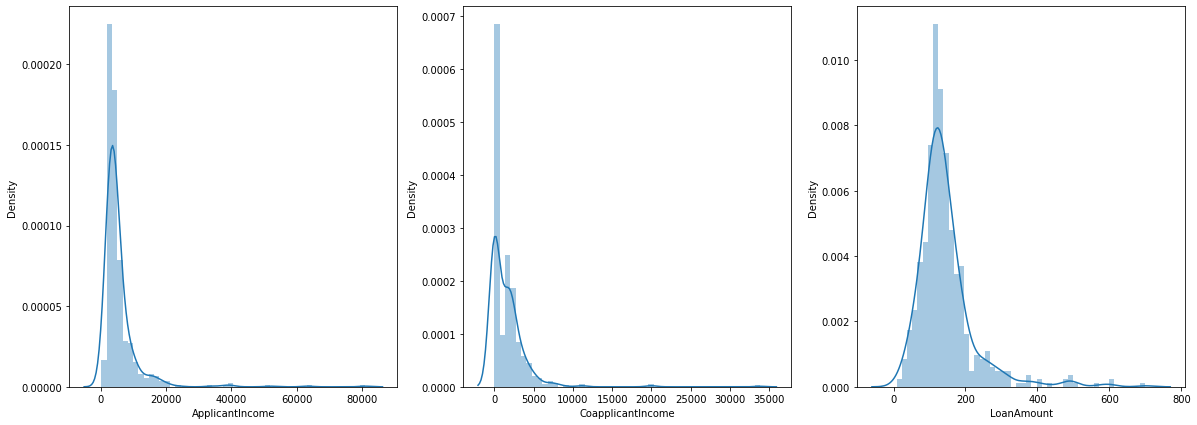

In [17]:
fig,axes=plt.subplots(1,3,figsize=(20,7))
for i,j in enumerate(cont_cols):
  sns.distplot(df[j],ax=axes[i],axlabel=j)

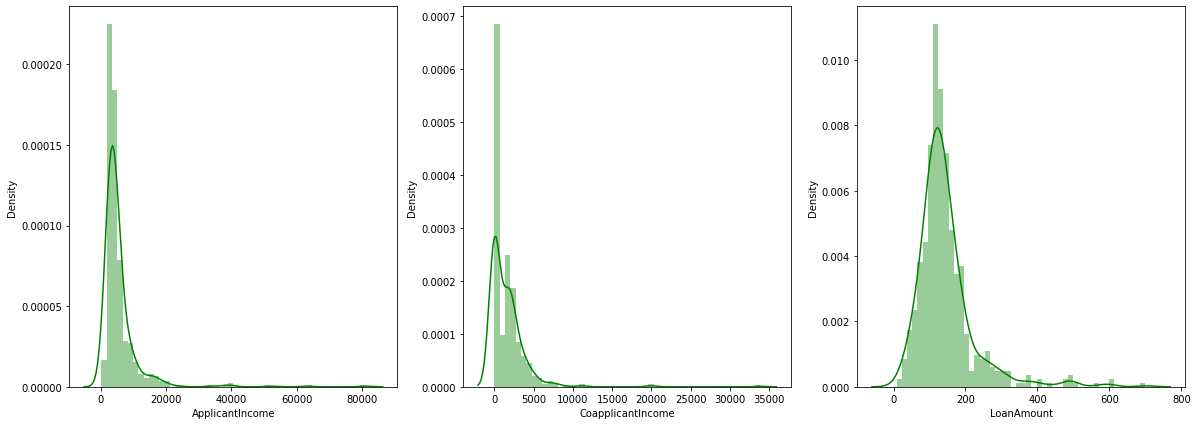

In [18]:
fig,axes=plt.subplots(1,3,figsize=(20,7))
for i,j in enumerate(cont_cols):
  sns.distplot(df[j],ax=axes[i],axlabel=j,color='g')

In [19]:
pt=PowerTransformer(standardize=False)
pt.fit(df[cont_cols])
df[cont_cols]=pt.transform(df[cont_cols])

In [20]:
for i in cont_cols:
    upper_limit=df[i].quantile(0.90)
    lower_limit=df[i].quantile(0.10)
    df.loc[df[i]>upper_limit,i]=upper_limit
    df.loc[df[i]<lower_limit,i]=lower_limit

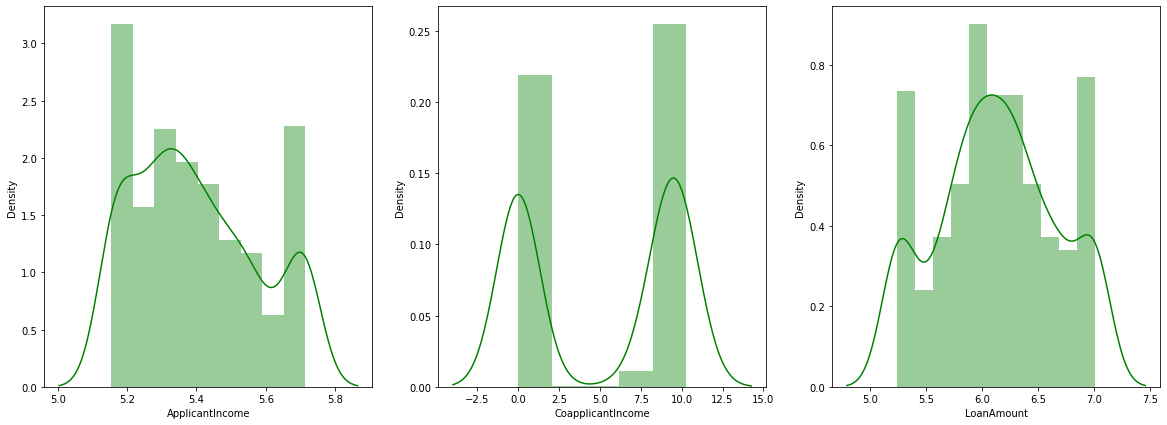

In [21]:
fig,axes=plt.subplots(1,3,figsize=(20,7))
for i,j in enumerate(cont_cols):
  sns.distplot(df[j],ax=axes[i],axlabel=j,color='g')

In [22]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [23]:
df['Dependents']=df['Dependents'].apply(lambda x:3 if x=='3+' else x)

In [24]:
df['Dependents']=df['Dependents'].apply(lambda x: int(x))

In [25]:
categorical_col=[x for x in df.columns if x not in df.describe()]

In [26]:
df[categorical_col].nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [27]:
df[categorical_col].head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [28]:
df=pd.get_dummies(df,columns=['Property_Area'],drop_first=True )
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Loan_Status']= df['Loan_Status'].apply(lambda x : 1 if x=='N' else 0)


In [29]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5.535131,0.000000,6.311928,360.0,1.0,0,0,1
1,1,1,1,0,0,5.442100,8.935724,6.116942,360.0,1.0,1,0,0


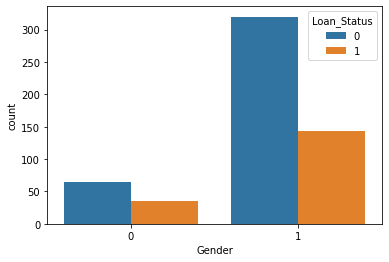

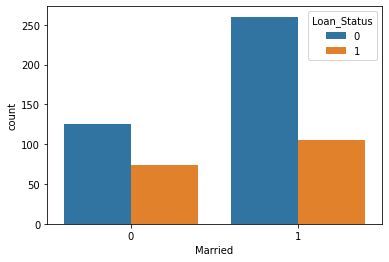

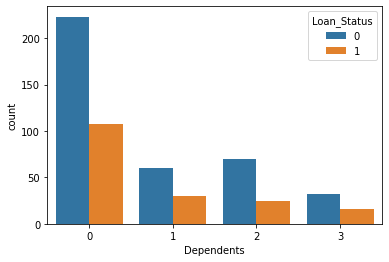

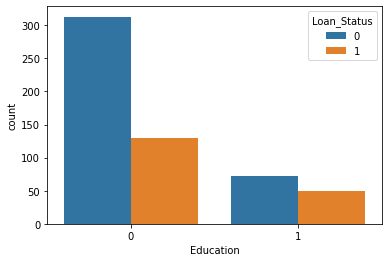

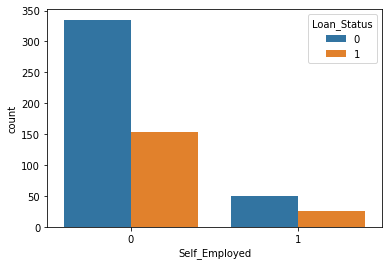

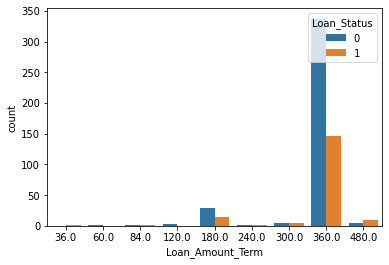

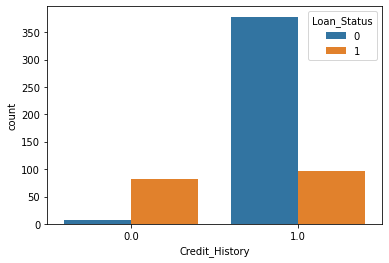

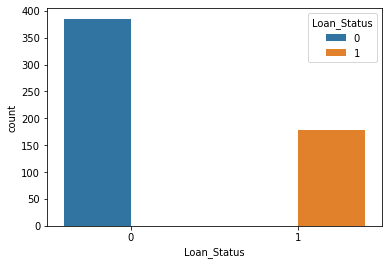

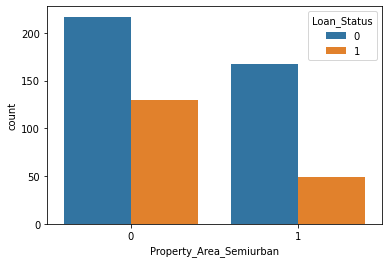

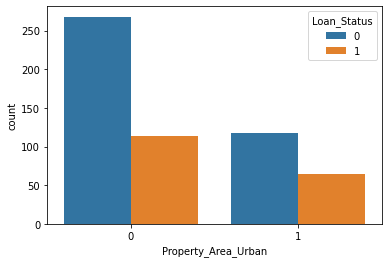

In [30]:
for i in df.columns:
  if df[i].nunique()<10:
    sns.countplot(df[i],hue=df['Loan_Status'])
    plt.show()
  else:
    pass

In [31]:
X=df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [32]:
y.value_counts()

0    385
1    179
Name: Loan_Status, dtype: int64

In [33]:
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

In [34]:
# f1_=0
# f2=0
# for i in range(0,10): 
#   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=i)
#   scaler=MinMaxScaler()
#   scaler.fit(X_train)
#   X_train=scaler.transform(X_train)
#   X_test=scaler.transform(X_test)
#   params = dict()
#   params['C'] = (1e-3,1)
#   params['penalty'] = ['l1','l2']
#   # define evaluation
#   cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
#   # define the search
#   search = BayesSearchCV(estimator=LogisticRegression(class_weight='balanced',solver='liblinear'), search_spaces=params, n_jobs=-1, cv=cv)
#   # perform the search
#   search.fit(X_train, y_train)
#   # lr=LogisticRegression(class_weight='balanced')
#   # lr.fit(X_train,y_train)
#   y_train_pred=search.predict(X_train)
#   y_test_pred=search.predict(X_test)
#   score_test=f1_score(y_test,y_test_pred)
#   score_train=f1_score(y_train,y_train_pred)
#   if f2<score_train and score_test>=score_train-0.05:
#     f1_=score_test
#     f2=score_train
#     random=i
#     print(search.best_score_)
#     print(search.best_params_)
  

In [54]:
#print(random, f1_)

# **Linear Discriminant Analysis**

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=8)
scaler1=StandardScaler()
scaler1.fit(X_train)
Xtrain=scaler.transform(X_train)
Xtest=scaler.transform(X_test)

In [57]:
lda = LinearDiscriminantAnalysis(solver='lsqr',priors=[0.60,0.40])
lda.fit(Xtrain, y_train)


LinearDiscriminantAnalysis(n_components=None, priors=[0.6, 0.4], shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [58]:
ytrain_pred=lda.predict(Xtrain)
ytest_pred=lda.predict(Xtest)

In [59]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       289
           1       0.89      0.49      0.63       134

    accuracy                           0.82       423
   macro avg       0.85      0.73      0.75       423
weighted avg       0.83      0.82      0.80       423



In [60]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        96
           1       0.91      0.47      0.62        45

    accuracy                           0.82       141
   macro avg       0.85      0.72      0.75       141
weighted avg       0.83      0.82      0.80       141



# **LD with Grid Search CV**

In [61]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=8)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
ld1=LinearDiscriminantAnalysis()
cv = StratifiedKFold(n_splits=3,shuffle=True)
param={'solver':['svd','lsqr','eigen'],'shrinkage':[0.1,1,0.001,0.01],'tol':[0.00001,2,1,0.000001,1e-06,1e-07],'priors':[[0.60,0.40],[0.70,30],[0.75,25],[0.40,0.60],[0.50,0.50],[30,70]]}
ld_grid=GridSearchCV(ld1,param_grid=param,cv=cv,scoring='f1')
ld_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'priors': [[0.6, 0.4], [0.7, 30], [0.75, 25],
                                    [0.4, 0.6], [0.5, 0.5], [30, 70]],
                         'shrinkage': [0.1, 1, 0.001, 0.01],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-05, 2, 1, 1e-06, 1e-06, 1e-07]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [64]:
ytrain_pred=ld_grid.predict(X_train)
ytest_pred=ld_grid.predict(X_test)

In [65]:
ld_grid.best_params_

{'priors': [0.6, 0.4], 'shrinkage': 0.1, 'solver': 'lsqr', 'tol': 1e-05}

In [68]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       289
           1       0.68      0.67      0.68       134

    accuracy                           0.80       423
   macro avg       0.77      0.76      0.76       423
weighted avg       0.80      0.80      0.80       423



In [67]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        96
           1       0.55      0.49      0.52        45

    accuracy                           0.71       141
   macro avg       0.66      0.65      0.65       141
weighted avg       0.70      0.71      0.70       141



# **Decision Tree**

## Decision Trees are  not sensitive to the range of the feature. Hence, they do not require any scaling.

In [49]:
dtc=DecisionTreeClassifier(max_features=7,max_depth=9,class_weight='balanced',ccp_alpha=0.0001)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=7,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [51]:
ytrain_pred=dtc.predict(X_train)
ytest_pred=dtc.predict(X_test)

In [52]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       289
           1       0.83      0.96      0.89       134

    accuracy                           0.92       423
   macro avg       0.90      0.93      0.91       423
weighted avg       0.93      0.92      0.92       423



In [53]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        96
           1       0.41      0.49      0.44        45

    accuracy                           0.61       141
   macro avg       0.57      0.58      0.57       141
weighted avg       0.63      0.61      0.62       141



# **Grid Search CV on Decision Trees.**

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=8)

In [44]:
dt1=DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=3)
param={'class_weight':['balanced'],'max_depth':[8,9,10,11,12],'max_features':[8,4,5,6,7],'ccp_alpha':[0.0001,0.00001,0.01,0.1,1]}
dt_s_grid=GridSearchCV(dt1,param_grid=param,cv=cv,scoring='recall')
dt_s_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [45]:
y_train_pred=dt_s_grid.predict(X_train)
y_test_pred=dt_s_grid.predict(X_test)

In [46]:
dt_s_grid.best_params_

{'ccp_alpha': 0.01,
 'class_weight': 'balanced',
 'max_depth': 12,
 'max_features': 5}

In [47]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       289
           1       0.68      0.67      0.68       134

    accuracy                           0.80       423
   macro avg       0.77      0.76      0.76       423
weighted avg       0.80      0.80      0.80       423



In [48]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        96
           1       0.55      0.49      0.52        45

    accuracy                           0.71       141
   macro avg       0.66      0.65      0.65       141
weighted avg       0.70      0.71      0.70       141



# **Logistic Regression**

In [36]:
!pip install scikit-optimize

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=8)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
lr=LogisticRegression(penalty='l1',solver='liblinear',C=0.1978,class_weight='balanced')
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [38]:
lr.coef_

array([[-0.04164968, -0.11469749, -0.05431729,  0.17912513,  0.        ,
         0.12507477, -0.09265635,  0.        ,  0.        , -1.31957659,
        -0.40395229,  0.        ]])

In [39]:
coeff=pd.DataFrame(zip(X.columns,lr.coef_.reshape(-1,1)),columns=['column','coefficients'])
imp_cols=list(coeff[coeff['coefficients']!=0]['column'])

In [40]:
coeff

,column,coefficients
0,Gender,[-0.041649680335240274]
1,Married,[-0.11469749178055808]
2,Dependents,[-0.05431729098543941]
3,Education,[0.17912513370673463]
4,Self_Employed,[0.0]
5,ApplicantIncome,[0.12507477080674653]
6,CoapplicantIncome,[-0.09265635089220471]
7,LoanAmount,[0.0]
8,Loan_Amount_Term,[0.0]
9,Credit_History,[-1.3195765943225168]


In [41]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       289
           1       0.71      0.56      0.63       134

    accuracy                           0.79       423
   macro avg       0.76      0.73      0.74       423
weighted avg       0.78      0.79      0.78       423



In [42]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        96
           1       0.82      0.51      0.63        45

    accuracy                           0.81       141
   macro avg       0.81      0.73      0.75       141
weighted avg       0.81      0.81      0.79       141



# **XGBoost**

In [80]:
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X[imp_cols],y,test_size=0.25,stratify=y)

In [82]:
179/385

0.4649350649350649

In [83]:
param_grid={'n_estimators':[100,200,300,400,500]}
xgb_1=XGBClassifier(scale_pos_weight=2,max_depth=3)
# define grid search
cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=3)
grid = GridSearchCV(estimator=xgb_1, param_grid=param_grid, cv=cv, scoring='f1_macro')
grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=None),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=2, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*

In [84]:
from sklearn import metrics
metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [85]:
grid.best_params_

{'n_estimators': 200}

In [86]:
y_train_pred=grid.predict(X_train)
y_test_pred=grid.predict(X_test)

In [87]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       289
           1       0.89      0.87      0.88       134

    accuracy                           0.92       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.92      0.92      0.92       423



In [88]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        96
           1       0.61      0.56      0.58        45

    accuracy                           0.74       141
   macro avg       0.70      0.69      0.70       141
weighted avg       0.74      0.74      0.74       141



# **Support Vector Machine**

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X[imp_cols],y,test_size=0.25,stratify=y)

In [70]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [71]:
sv1=svm.SVC(class_weight='balanced')
sv1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
y_train_pred=sv1.predict(X_train)
y_test_pred=sv1.predict(X_test)

In [73]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       289
           1       0.87      0.60      0.71       134

    accuracy                           0.84       423
   macro avg       0.85      0.78      0.80       423
weighted avg       0.85      0.84      0.83       423



In [74]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        96
           1       0.76      0.42      0.54        45

    accuracy                           0.77       141
   macro avg       0.77      0.68      0.70       141
weighted avg       0.77      0.77      0.75       141



# **SVM with Grid Search CV**

In [75]:
svm1=svm.SVC(gamma='auto')
param={'kernel':['rbf','linear','poly','sigmoid'],'C':[0.1,2,0.01,0.00000001,1,3], 'class_weight':['balanced','0:1,1:2'],'degree':[1,2,3,4,0],'shrinking':[True,False]}
cv = RepeatedStratifiedKFold(n_splits=2,n_repeats=2)
sv_grid=GridSearchCV(svm1,param_grid=param,cv=cv,scoring='f1')
sv_grid.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 2, 0.01, 1e-08, 1, 3],
                         'class_weight': ['balanced', '0:1,1:2'],
                         'degree': [1, 2, 3, 4, 0],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [76]:
y_train_pred=sv_grid.predict(X_train)
y_test_pred=sv_grid.predict(X_test)

In [77]:
sv_grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'degree': 1,
 'kernel': 'linear',
 'shrinking': True}

In [78]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       289
           1       0.92      0.49      0.64       134

    accuracy                           0.83       423
   macro avg       0.86      0.74      0.76       423
weighted avg       0.84      0.83      0.81       423



In [79]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86        96
           1       0.94      0.36      0.52        45

    accuracy                           0.79       141
   macro avg       0.85      0.67      0.69       141
weighted avg       0.82      0.79      0.75       141



## **Resampling**

# **SMOTE Tomek Link with XGBoost**

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X[imp_cols].values,y,test_size=0.30,stratify=y)

In [ ]:
smt=SMOTETomek(random_state=139)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [ ]:
X_train.shape

(508, 9)

In [ ]:
X_test.shape

(170, 9)

In [ ]:
# define evaluation procedure
cv = StratifiedKFold(n_splits=3, shuffle=True)
xgb_1=XGBClassifier()
# define grid search
grid = GridSearchCV(estimator=xgb_1, param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs'

In [ ]:
y_train_pred=grid.predict(X_train)
y_test_pred=grid.predict(X_test)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       254
           1       1.00      0.99      0.99       254

    accuracy                           0.99       508
   macro avg       0.99      0.99      0.99       508
weighted avg       0.99      0.99      0.99       508



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       116
           1       0.56      0.57      0.57        54

    accuracy                           0.72       170
   macro avg       0.68      0.68      0.68       170
weighted avg       0.72      0.72      0.72       170



# **SMOTE Tomek Link with SVM**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X[imp_cols].values,y,test_size=0.30,stratify=y)

In [ ]:
smt=SMOTETomek(random_state=139,)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
sv_1=svm.SVC()
param={'kernel':['rbf','linear','poly'],'C':[0.1,0.0001,0.00001,0.00000001,1],'gamma':[0.001,0.0001,1,2,5,6,7,8,9]}
cv = StratifiedKFold(n_splits=3)
sv_gscv=GridSearchCV(sv_1,param_grid=param,cv=cv, scoring='f1')
sv_gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.0001, 1e-05, 1e-08, 1],
                         'gamma': [0.001, 0.0001, 1, 2, 5, 6, 7, 8, 9],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
y_train_pred=sv_gscv.predict(X_train)
y_test_pred=sv_gscv.predict(X_test)

In [ ]:
sv_gscv.best_params_

{'C': 0.0001, 'gamma': 7, 'kernel': 'poly'}

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       251
           1       0.95      0.91      0.93       251

    accuracy                           0.93       502
   macro avg       0.93      0.93      0.93       502
weighted avg       0.93      0.93      0.93       502



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       116
           1       0.53      0.61      0.57        54

    accuracy                           0.71       170
   macro avg       0.67      0.68      0.67       170
weighted avg       0.72      0.71      0.71       170



# **SMOTE Tomek Link with KNearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_1=KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance',p=1)
knn_1.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [ ]:
y_train_pred=knn_1.predict(X_train)
y_test_pred=knn_1.predict(X_test)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       251

    accuracy                           1.00       502
   macro avg       1.00      1.00      1.00       502
weighted avg       1.00      1.00      1.00       502



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       116
           1       0.65      0.65      0.65        54

    accuracy                           0.78       170
   macro avg       0.74      0.74      0.74       170
weighted avg       0.78      0.78      0.78       170



# **Decision Tree with SMOTE Tomek Link**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X[imp_cols].values,y,test_size=0.25,stratify=y)

In [ ]:
X_train.shape

(423, 9)

In [ ]:
smt=SMOTETomek(random_state=139,)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [ ]:
X_train.shape

(534, 9)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       267

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        96
           1       0.57      0.60      0.59        45

    accuracy                           0.73       141
   macro avg       0.69      0.70      0.69       141
weighted avg       0.73      0.73      0.73       141



# **Grid Search CV**

In [ ]:
X_train.shape

(534, 9)

In [ ]:
dt_1=DecisionTreeClassifier()
param={'max_depth':[3,5,6,7,8,9],'min_samples_leaf':[9,8,7,6],'ccp_alpha':[1e-09,1e-08,1e-20,1e-15],'min_samples_split':[1,2,3,4,5,6]}
dt_s_gscv=GridSearchCV(dt_1,param_grid=param,cv=3,scoring='roc_auc')
dt_s_gscv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [1e-09, 1e-08, 1e-20, 1e-15],
          

In [ ]:
y_train_pred=dt_s_gscv.predict(X_train)
y_test_pred=dt_s_gscv.predict(X_test)

In [ ]:
dt_s_gscv.best_params_

{'ccp_alpha': 1e-15,
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 5}

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       267
           1       0.91      0.75      0.83       267

    accuracy                           0.84       534
   macro avg       0.85      0.84      0.84       534
weighted avg       0.85      0.84      0.84       534



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        96
           1       0.69      0.53      0.60        45

    accuracy                           0.77       141
   macro avg       0.74      0.71      0.72       141
weighted avg       0.76      0.77      0.76       141



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X[imp_cols].values,y,test_size=0.25,stratify=y)

In [ ]:
X_train.shape

(423, 9)

In [ ]:
smt=SMOTETomek(random_state=139,)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [ ]:
X_train.shape

(542, 9)

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       271

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        96
           1       0.83      0.42      0.56        45

    accuracy                           0.79       141
   macro avg       0.80      0.69      0.71       141
weighted avg       0.79      0.79      0.76       141



In [ ]:
rf=RandomForestClassifier()
param={'max_depth':[3,5,6,7,8,9],'min_samples_leaf':[9,8,7,6],'ccp_alpha':[1e-09,1e-08,1e-20,1e-15],'min_samples_split':[1,2,3,4,5,6]}
rf_gcsv=GridSearchCV(rf,param_grid=param,cv=3,scoring='roc_auc')
rf_gcsv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
y_train_pred=rf_gcsv.predict(X_train)
y_test_pred=rf_gcsv.predict(X_test)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       271
           1       0.95      0.86      0.90       271

    accuracy                           0.91       542
   macro avg       0.91      0.91      0.91       542
weighted avg       0.91      0.91      0.91       542



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        96
           1       0.81      0.38      0.52        45

    accuracy                           0.77       141
   macro avg       0.79      0.67      0.68       141
weighted avg       0.78      0.77      0.74       141



# ***Saving Model***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=8)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
lr=LogisticRegression(penalty='l1',solver='liblinear',C=0.1978,class_weight='balanced')
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        96
           1       0.82      0.51      0.63        45

    accuracy                           0.81       141
   macro avg       0.81      0.73      0.75       141
weighted avg       0.81      0.81      0.79       141



In [89]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)
 
# Load the pickled model
dtc_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
dtc_from_pickle.predict(X_test)

ValueError: ignored